In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [4]:
df.dropna().sum()
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [6]:
df.replace("?" , np.nan , inplace=True)


In [7]:
df.dropna(inplace=True)

In [8]:
df.drop("educational-num" , axis=1 , inplace=True)


In [9]:
cat_col = df.select_dtypes(include="object").columns

In [10]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
print("encoded columns:" , cat_col.tolist())

encoded columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [11]:
x = df.drop("income" , axis=1)
y = df[["income"]]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size=0.2,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [14]:
dt.score(x_test,y_test)

0.8064194798007748

In [15]:
dt.score(x_train,y_train)

0.9999169894853348

In [16]:
pred = dt.predict(x_test)
y_test["prediction"] = pred
y_test

,income,prediction
12010,0,0
12197,0,1
4488,0,1
23026,0,0
19544,0,0
...,...,...
46445,0,1
17149,1,1
45708,0,0
9840,0,0


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_test["income"], pred))
print(classification_report(y_test["income"], pred))

[[5945  897]
 [ 852 1341]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6842
           1       0.60      0.61      0.61      2193

    accuracy                           0.81      9035
   macro avg       0.74      0.74      0.74      9035
weighted avg       0.81      0.81      0.81      9035



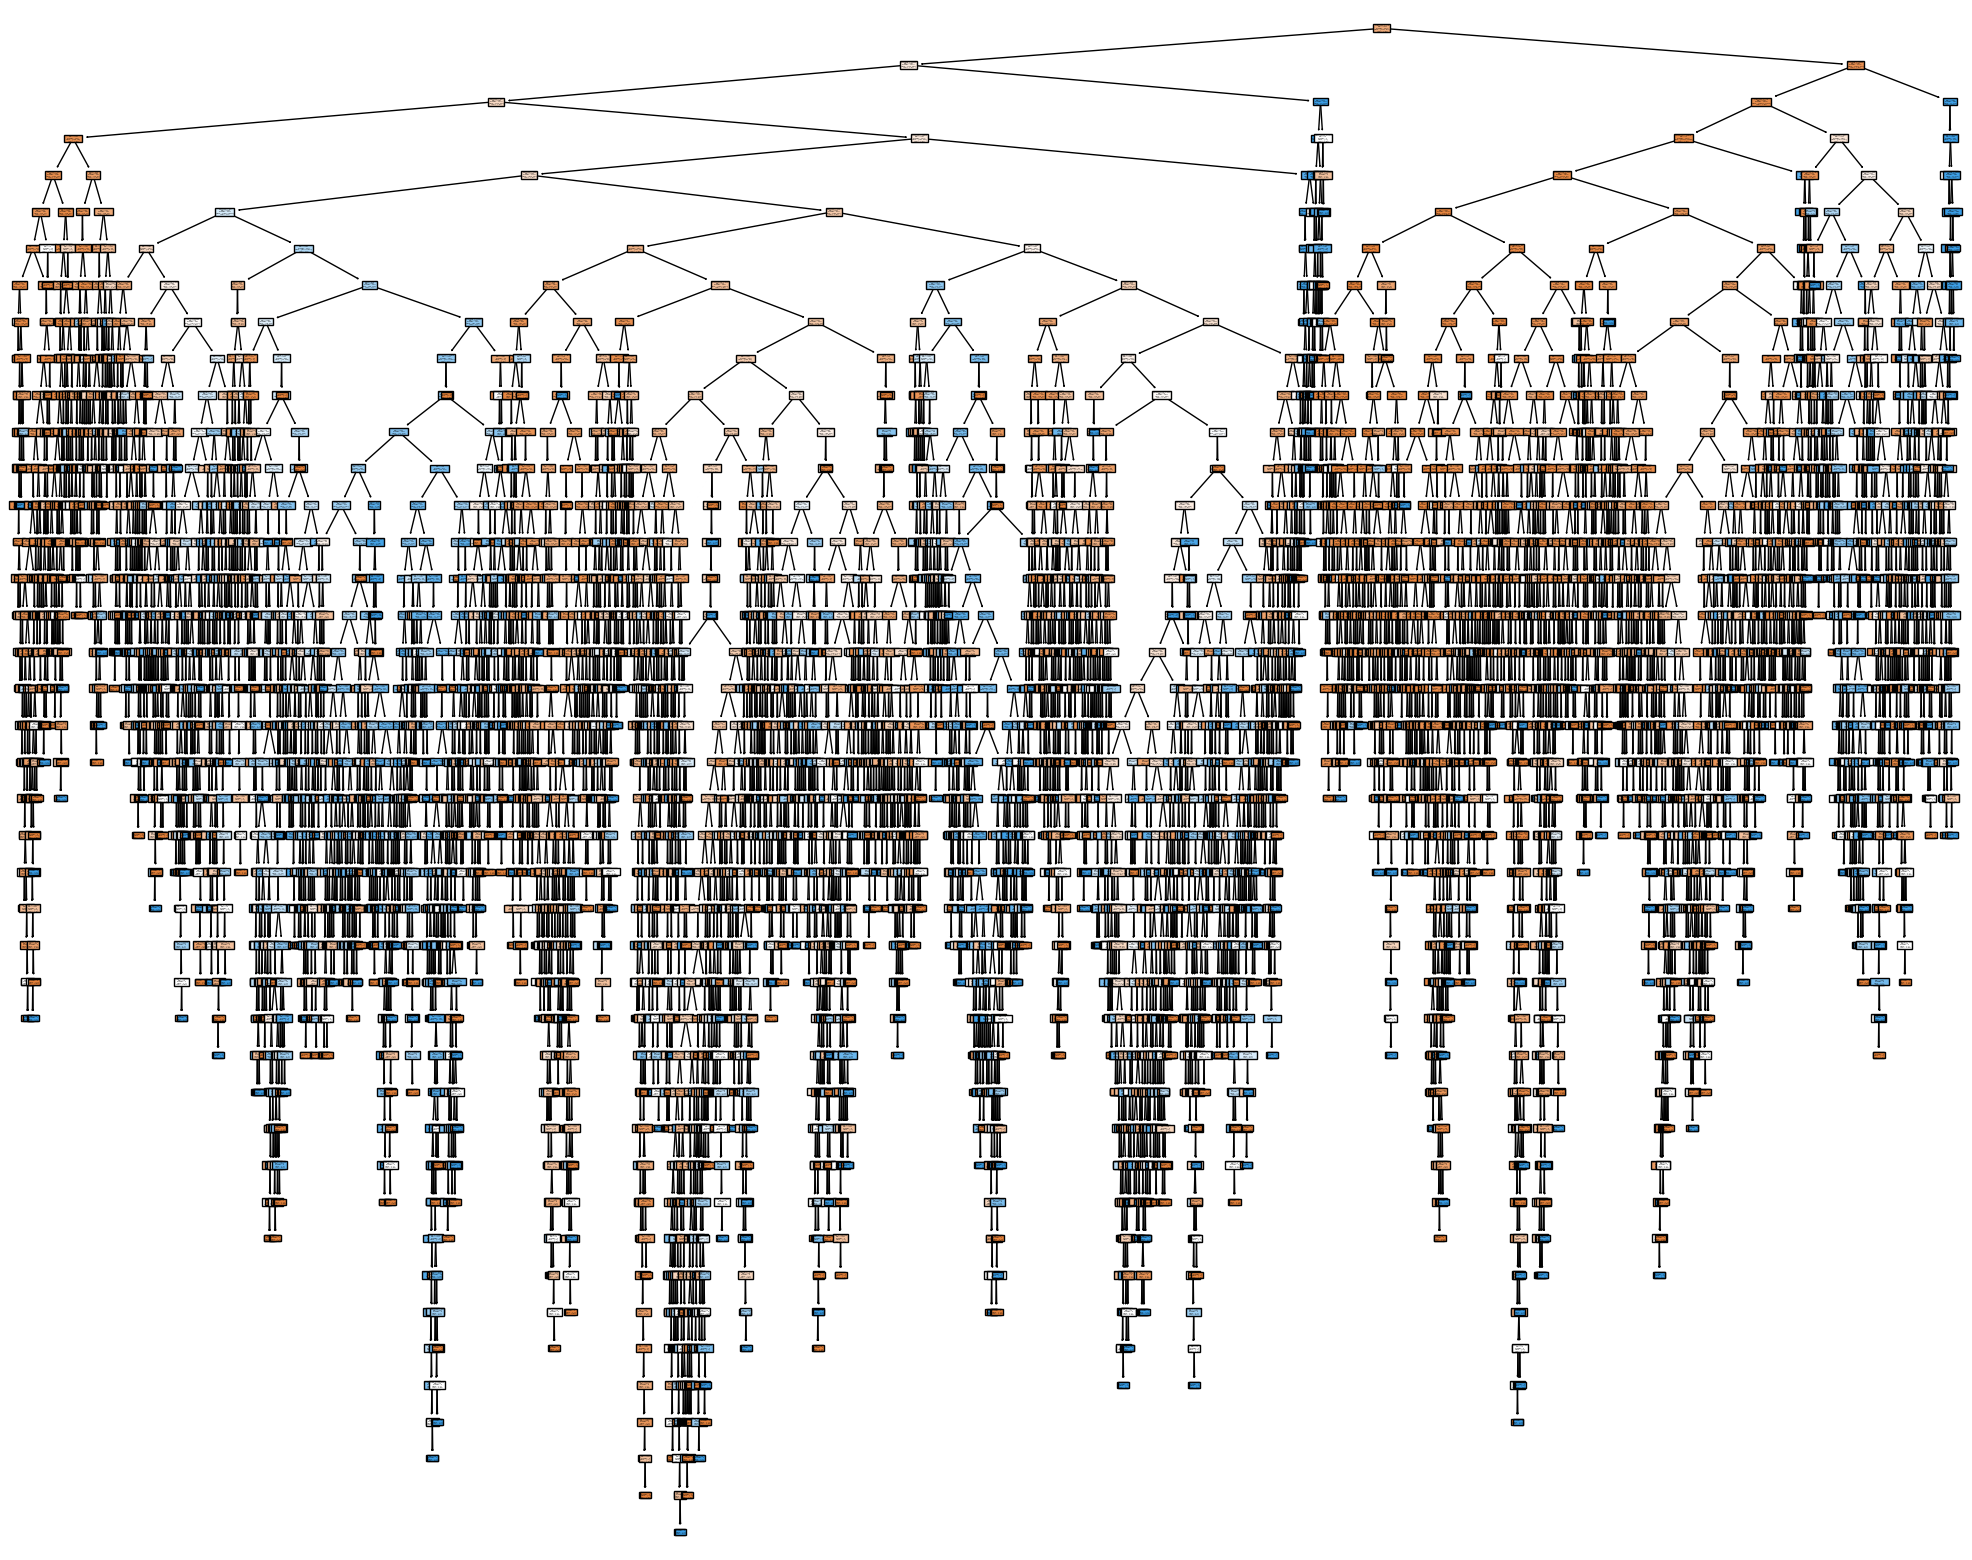

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=["<=50K", ">50K"])
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)


/Users/priyanshubansal/developer/training/notebookenv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [20]:
rf.score(x_test, y_test["income"])

0.8545655783065855

In [21]:
rf.score(x_train, y_train["income"])

0.9999169894853348

In [23]:
df = pd.read_csv("cardekho_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [25]:
df.dropna(inplace=True)

In [26]:
df.drop_duplicates(inplace=True)
